##Using Github

In [ ]:
%%capture
%%bash
wget https://github.com/leec0140/NYP110/raw/main/IT110-Grocery.v2i.yolov8.zip
wget https://github.com/leec0140/NYP110/raw/main/hyp.yaml
mkdir -p datasets
unzip IT110-Grocery.v2i.yolov8.zip -d datasets/
mv hyp.yaml datasets/

CalledProcessError: Command 'b'wget https://github.com/leec0140/NYP110/raw/main/IT110-Grocery.v2i.yolov8.zip\nwget https://github.com/leec0140/NYP110/raw/main/hyp.yaml\nmkdir -p datasets\nunzip IT110-Grocery.v2i.yolov8.zip -d datasets/\nmv hyp.yaml datasets/\n'' returned non-zero exit status 1.

In [ ]:
%%capture
!pip install ultralytics
!pip install comet_ml

Setup the logging Ultralytics support logging to wandb, comet and tensorboard, out of the box. Here we only enable wandb.

In [ ]:
from ultralytics import settings

settings.update({"wandb": True,
                 "comet": False,
                 "tensorboard": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
##Set up wandb: API key 069f0efc6c6cf02f556da8f75cea67ec95a81021
%%capture
!pip install wandb
!wandb login

Training

We specify the path to data.yaml file, and train with a batch size of 30, and we also save the checkpoint at each epoch (save_period=1). Connected to a GPU, hence we can specify the device to use as device=0 to select the first GPU. We specify the project name as grocery, this will create a folder called grocery to store the weights and various training artifacts such as F1, PR curves, confusion matrics, training results (loss, mAP, etc).

In [ ]:
from ultralytics import YOLO
from ultralytics import settings

model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
result = model.train(data="/content/datasets2/data.yaml",
                     epochs=30,
                     save_period=1,
                     batch=30,
                     device=0,
                     project='grocery',
                     plots=True)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets2/data.yaml, epochs=30, time=None, patience=100, batch=30, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=grocery, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 135MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

wandb: Currently logged in as: wave23 (wave23-nanyang-polytechnic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 343MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets2/train/labels... 1824 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1824/1824 [00:01<00:00, 1481.21it/s]

train: New cache created: /content/datasets2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 4746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets2/valid/labels... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 1236.21it/s]

val: New cache created: /content/datasets2/valid/labels.cache


Plotting labels to grocery/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to grocery/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.28G     0.9679      2.669      1.293         87        640: 100%|██████████| 61/61 [00:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        221        885      0.828      0.807      0.889      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.41G     0.7853     0.8907      1.131         86        640: 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.838      0.866      0.913      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       6.5G     0.7916     0.8024      1.142        105        640: 100%|██████████| 61/61 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885      0.817      0.764      0.851      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.41G     0.8089     0.7543      1.151        117        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.788      0.801      0.863       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.46G     0.7866     0.6931      1.145        109        640: 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        221        885      0.892      0.866      0.928      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.44G      0.754     0.6391      1.121         94        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.904      0.881      0.928      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.46G     0.7331     0.5987      1.113         97        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.916      0.913      0.952      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       6.4G     0.7316      0.571      1.105        136        640: 100%|██████████| 61/61 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.902      0.934      0.932      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       6.5G     0.7131     0.5426      1.098        127        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.949      0.933       0.97      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       6.4G     0.7042     0.5251      1.087        118        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.933      0.939      0.965      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.46G     0.7006     0.5189      1.088        121        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.959      0.946      0.967      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       6.4G     0.6794     0.4925      1.083        154        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        221        885      0.974      0.968      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.45G     0.6853     0.4921      1.083         99        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        221        885      0.966      0.964      0.978      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.41G     0.6716     0.4651      1.073        169        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.972      0.958      0.977      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.46G     0.6615     0.4627      1.068        108        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        221        885      0.966      0.963      0.977      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       6.4G     0.6492     0.4339      1.053        109        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885      0.979      0.968       0.98      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.36G     0.6254      0.419      1.046        113        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.977      0.976       0.98       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.44G     0.6287     0.4258      1.052        153        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        221        885      0.981      0.975       0.98      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.44G     0.6259     0.4176       1.05        141        640: 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.979      0.976      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.48G     0.6028     0.3921      1.038        101        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.976      0.974      0.979      0.845


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.37G     0.5021     0.3126     0.9576         55        640: 100%|██████████| 61/61 [00:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        221        885       0.98      0.971      0.982      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.45G     0.4926     0.3039      0.959         39        640: 100%|██████████| 61/61 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.982      0.968      0.979      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.44G     0.4838     0.2954     0.9505         47        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.974      0.976      0.981      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.39G     0.4779     0.2815     0.9374         84        640: 100%|██████████| 61/61 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.982      0.968      0.979      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.37G      0.466     0.2771      0.938         74        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        221        885      0.979      0.976      0.981      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.41G     0.4617     0.2641     0.9272         65        640: 100%|██████████| 61/61 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.981      0.975       0.98      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.45G     0.4459     0.2579     0.9211         54        640: 100%|██████████| 61/61 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885       0.98      0.977      0.982      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.39G     0.4383     0.2481     0.9177         68        640: 100%|██████████| 61/61 [00:18<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        221        885      0.982      0.977       0.98      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.45G     0.4331     0.2442     0.9155         57        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.982      0.978       0.98      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       6.4G     0.4269     0.2403      0.914         44        640: 100%|██████████| 61/61 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        221        885      0.982      0.978       0.98      0.868



30 epochs completed in 0.175 hours.
Optimizer stripped from grocery/train2/weights/last.pt, 22.5MB
Optimizer stripped from grocery/train2/weights/best.pt, 22.5MB

Validating grocery/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


                   all        221        885       0.98      0.977      0.982      0.869
                 apple         32         41      0.993          1      0.995      0.911
                banana         41         41      0.964          1      0.981      0.905
           bell-pepper         49        106      0.992          1      0.995       0.82
                carrot         75        208      0.995      0.927      0.986      0.771
                  eggs         33         35      0.992      0.971      0.979      0.884
        instant-noodle         52         77          1      0.983      0.995      0.877
                 lemon         65         97      0.989      0.969      0.985      0.873
                  milk         34         36       0.99          1      0.995      0.901
          toilet-paper         19         31        0.9      0.935      0.948      0.824
              tuna-can         66         86      0.988      0.987      0.984      0.846
        yanyan-cracke

lr/pg0,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▃▄▁▂▅▅▆▅▇▇▇███████████████████
metrics/mAP50-95(B),▃▄▁▁▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇██████████
metrics/precision(B),▂▃▂▁▅▅▆▅▇▆▇█▇█▇███████████████
metrics/recall(B),▂▄▁▂▄▅▆▇▇▇▇██▇████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▂▂▂▂▂▁▁▁▁▁


In [ ]:
from ultralytics import YOLO

# Load the best model checkpoint
model = YOLO("grocery/train2/weights/best.pt")
validation_results = model.val(data="/content/datasets2/data.yaml", device=0)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]


                   all        221        885       0.98      0.977      0.982      0.868
                 apple         32         41      0.993          1      0.995      0.911
                banana         41         41      0.964          1       0.98      0.903
           bell-pepper         49        106      0.992          1      0.995      0.819
                carrot         75        208      0.995      0.928      0.986       0.77
                  eggs         33         35      0.992      0.971      0.979      0.885
        instant-noodle         52         77          1      0.983      0.995      0.874
                 lemon         65         97      0.989      0.969      0.986      0.872
                  milk         34         36       0.99          1      0.995      0.901
          toilet-paper         19         31        0.9      0.935      0.948      0.825
              tuna-can         66         86      0.988      0.987      0.984      0.846
        yanyan-cracke

##Data augmentation


In [ ]:
from ultralytics import YOLO
from ultralytics import settings

model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
result = model.train(data="/content/datasets2/data.yaml",
                     cfg="/content/datasets2/hyp.yaml",
                     epochs=30,
                     save_period=1,
                     batch=30,
                     device=0,
                     project='grocery',
                     plots=True)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets2/data.yaml, epochs=30, time=None, patience=100, batch=30, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=grocery, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets2/train/labels.cache... 1824 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1824/1824 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 4746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]


Plotting labels to grocery/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to grocery/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.62G      1.297      2.663      1.556        280        640: 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        221        885      0.789      0.733      0.812      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.46G      1.012      1.237      1.313        228        640: 100%|██████████| 61/61 [00:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885      0.908      0.811      0.914      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.56G     0.9822      1.095      1.307        280        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        221        885      0.832      0.723      0.846      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.37G      0.983      1.031      1.298        270        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        221        885      0.878      0.852      0.907      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.57G     0.9648     0.9689      1.293        217        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        221        885      0.887      0.883      0.924      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.51G     0.9419     0.9149      1.278        242        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.861      0.873      0.915      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.55G     0.9129     0.8628      1.257        220        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.916      0.903      0.946      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.38G     0.8908     0.8104      1.237        242        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.926       0.92      0.955      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.57G     0.8751     0.7799      1.231        241        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.905      0.924      0.947      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.45G     0.8604     0.7607      1.218        218        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        221        885      0.938      0.934      0.959      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.38G     0.8501     0.7411       1.21        289        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.942      0.932      0.965      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.51G     0.8532     0.7158      1.213        255        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.964      0.948      0.974      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.54G     0.8368     0.7022      1.202        238        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.968      0.939      0.969      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.37G      0.832     0.6828      1.194        277        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.966      0.959      0.972      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.51G     0.8127     0.6523      1.184        255        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        221        885      0.951      0.944      0.969      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.45G      0.796     0.6427       1.17        263        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885       0.94      0.909      0.964      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.49G     0.7938     0.6344       1.17        245        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        221        885      0.952      0.956      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.37G      0.793     0.6274       1.17        278        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.962      0.967      0.979      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.56G     0.7798     0.5998       1.16        236        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.978      0.968      0.983      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.44G     0.7658     0.5991      1.156        190        640: 100%|██████████| 61/61 [00:18<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.977      0.972      0.981      0.844


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.41G     0.5571     0.4053     0.9936         55        640: 100%|██████████| 61/61 [00:19<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.981      0.962      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.49G     0.5392     0.3436     0.9903         39        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        221        885      0.978      0.967       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.48G     0.5286     0.3255     0.9791         47        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        221        885      0.983      0.966      0.981       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.44G     0.5112     0.3096     0.9632         84        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885      0.977      0.971      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.42G     0.5054     0.3034     0.9659         74        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.983      0.974      0.983      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.45G     0.4987     0.2919     0.9552         65        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        221        885       0.98      0.979      0.982      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.49G     0.4884     0.2834      0.952         54        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.979      0.976      0.983      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.43G     0.4776     0.2707     0.9424         68        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.983      0.977      0.984      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.49G     0.4733     0.2645     0.9393         57        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        221        885      0.983      0.978      0.983      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.45G     0.4653     0.2605      0.933         44        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885      0.983      0.978      0.985      0.874



30 epochs completed in 0.177 hours.
Optimizer stripped from grocery/train3/weights/last.pt, 22.5MB
Optimizer stripped from grocery/train3/weights/best.pt, 22.5MB

Validating grocery/train3/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


                   all        221        885      0.983      0.978      0.985      0.874
                 apple         32         41      0.991          1      0.995      0.915
                banana         41         41      0.955          1      0.985      0.912
           bell-pepper         49        106          1      0.998      0.995      0.837
                carrot         75        208      0.995      0.948       0.99      0.775
                  eggs         33         35      0.991      0.971      0.978      0.884
        instant-noodle         52         77      0.994      0.974      0.992      0.887
                 lemon         65         97      0.989      0.969      0.988      0.886
                  milk         34         36      0.992          1      0.995      0.903
          toilet-paper         19         31      0.957      0.935      0.965       0.83
              tuna-can         66         86      0.988      0.985      0.984      0.845
        yanyan-cracke

lr/pg0,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▅▂▅▆▅▆▇▆▇▇█▇▇▇▇██████████████
metrics/mAP50-95(B),▁▄▁▃▃▃▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████
metrics/precision(B),▁▅▃▄▅▄▆▆▅▆▇▇▇▇▇▆▇▇████████████
metrics/recall(B),▁▃▁▅▅▅▆▆▆▇▇▇▇▇▇▆▇█████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▂▂▂▁▁▁▁▁▁▁


In [ ]:
from ultralytics import YOLO

# Load the best model checkpoint
model = YOLO("grocery/train3/weights/best.pt")
validation_results = model.val(data="/content/datasets2/data.yaml", device=0)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]


                   all        221        885      0.983      0.978      0.985      0.874
                 apple         32         41      0.991          1      0.995      0.919
                banana         41         41      0.955          1      0.985      0.908
           bell-pepper         49        106          1      0.998      0.995      0.835
                carrot         75        208      0.995      0.948       0.99      0.776
                  eggs         33         35      0.991      0.971      0.978      0.886
        instant-noodle         52         77      0.994      0.974      0.992      0.886
                 lemon         65         97      0.989      0.969      0.988      0.884
                  milk         34         36      0.992          1      0.995        0.9
          toilet-paper         19         31      0.957      0.935      0.965      0.833
              tuna-can         66         86      0.988      0.985      0.984      0.845
        yanyan-cracke

##Previously Train8's model

In [ ]:
from ultralytics import YOLO
from ultralytics import settings

def train_model(epochs, batch_size, learning_rate, momentum):
    """Trains a YOLO model with specified hyperparameters and data augmentation"""

    model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
    optimizer_name = "adam"  # Default optimizer

    result = model.train(data="/content/datasets2/data.yaml",
                        cfg="/content/datasets2/hyp.yaml",
                        epochs=epochs,
                        save_period=1,
                        batch=batch_size,
                        optimizer=optimizer_name,
                        lr0=learning_rate,
                        momentum=momentum,
                        device=0,
                        project='grocery',
                        plots=True)

    return result


# Train with final hyperparameters
result1 = train_model(epochs=50, batch_size=48, learning_rate=0.0005, momentum=0.95)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets2/data.yaml, epochs=50, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=grocery, name=train5, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets2/train/labels.cache... 1824 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1824/1824 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 4746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]


Plotting labels to grocery/train5/labels.jpg... 
optimizer: Adam(lr=0.0005, momentum=0.95) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to grocery/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.2G      1.321      2.834      1.577        427        640: 100%|██████████| 38/38 [00:21<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all        221        885      0.349      0.393      0.302      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.1G      1.023      1.312      1.323        440        640: 100%|██████████| 38/38 [00:20<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all        221        885      0.636      0.649      0.722      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.99G     0.9968      1.118       1.31        459        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all        221        885      0.795      0.651      0.759      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        10G     0.9829      1.015      1.292        519        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


                   all        221        885      0.728      0.749      0.774      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.1G     0.9565     0.9526      1.281        427        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all        221        885      0.808       0.77      0.864      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.1G     0.9329     0.9154      1.272        484        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all        221        885      0.907       0.89      0.948      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.99G      0.915     0.8803      1.261        482        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all        221        885      0.881       0.85      0.934      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.1G     0.8899     0.8288      1.243        470        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all        221        885       0.78      0.823      0.843      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.97G     0.8872     0.7948       1.23        466        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


                   all        221        885      0.925      0.907      0.943      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.99G     0.8675      0.781      1.227        462        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all        221        885      0.946      0.944      0.964      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        10G     0.8522     0.7478      1.208        454        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all        221        885      0.935      0.937      0.967      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.1G     0.8603     0.7361      1.216        447        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all        221        885       0.96      0.948      0.973      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.99G     0.8631     0.7232       1.21        460        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all        221        885      0.948       0.95      0.969      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.1G      0.841     0.7169      1.207        553        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all        221        885      0.937      0.951       0.97      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.1G     0.8254     0.6832      1.185        434        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


                   all        221        885      0.932       0.96      0.971      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        10G      0.819     0.6814      1.193        542        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all        221        885      0.969      0.929      0.969      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.1G     0.8121     0.6626      1.188        430        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all        221        885      0.962       0.94      0.974      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.99G     0.8233     0.6795      1.194        482        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all        221        885      0.954      0.966      0.975       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.1G     0.8054     0.6467      1.179        503        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all        221        885      0.955      0.962      0.975      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.1G     0.7942     0.6342       1.17        479        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all        221        885      0.967      0.942      0.973      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.1G     0.8008     0.6369      1.172        543        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all        221        885      0.971      0.959      0.978      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.1G     0.7789     0.6145      1.161        508        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all        221        885      0.977      0.965      0.982      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.99G     0.7798     0.6121      1.158        465        640: 100%|██████████| 38/38 [00:20<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all        221        885      0.945       0.95       0.97      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.1G     0.7816     0.5975      1.159        488        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all        221        885      0.953      0.967      0.978      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.1G     0.7618     0.5896      1.147        413        640: 100%|██████████| 38/38 [00:20<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all        221        885      0.968      0.954      0.977      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        10G     0.7711     0.5895      1.154        485        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all        221        885      0.962      0.966      0.979      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.1G     0.7619     0.5885      1.148        581        640: 100%|██████████| 38/38 [00:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all        221        885      0.981      0.966      0.981      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        10G     0.7505     0.5675      1.145        479        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all        221        885      0.977      0.963      0.981      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.97G     0.7466     0.5672      1.139        429        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all        221        885      0.978      0.964      0.982      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.99G     0.7379     0.5558      1.129        443        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all        221        885      0.959      0.965      0.978      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        10G     0.7429     0.5576      1.133        447        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all        221        885      0.966      0.974      0.982      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.98G     0.7402     0.5477      1.131        490        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all        221        885      0.961      0.963      0.981      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.1G     0.7243     0.5365      1.121        498        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all        221        885      0.978      0.979      0.983      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        10G     0.7323     0.5311      1.124        456        640: 100%|██████████| 38/38 [00:20<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all        221        885      0.975      0.973      0.981      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.1G     0.7187     0.5256      1.117        445        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all        221        885      0.977      0.975      0.983      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.99G     0.7144     0.5175       1.12        518        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all        221        885      0.978       0.97      0.983      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        10G     0.7191     0.5171      1.123        491        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all        221        885      0.979      0.971      0.984      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.1G     0.7196     0.5125      1.114        441        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all        221        885      0.971      0.964      0.982      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        10G     0.7013      0.501      1.109        475        640: 100%|██████████| 38/38 [00:19<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all        221        885      0.975       0.98      0.986      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.1G     0.6954     0.4957      1.104        513        640: 100%|██████████| 38/38 [00:19<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all        221        885      0.968      0.981      0.984      0.856


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        10G     0.5148     0.3588     0.9736        102        640: 100%|██████████| 38/38 [00:20<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all        221        885      0.986      0.977      0.984      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        10G     0.4948     0.2876     0.9476        133        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all        221        885       0.98      0.975      0.984      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        10G     0.4896     0.2813     0.9443        135        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all        221        885      0.977      0.976      0.983      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        10G     0.4855     0.2756     0.9507        109        640: 100%|██████████| 38/38 [00:19<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all        221        885       0.98      0.974      0.984      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        10G      0.478     0.2667     0.9406        123        640: 100%|██████████| 38/38 [00:19<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all        221        885      0.979      0.978      0.984       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        10G     0.4665      0.258     0.9327        146        640: 100%|██████████| 38/38 [00:19<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all        221        885      0.982       0.98      0.984      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        10G     0.4596     0.2545      0.931        121        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all        221        885      0.981      0.978      0.984      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        10G     0.4552       0.25     0.9317        137        640: 100%|██████████| 38/38 [00:19<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all        221        885      0.981      0.977      0.984      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        10G     0.4535     0.2456     0.9177        127        640: 100%|██████████| 38/38 [00:19<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all        221        885      0.985      0.981      0.984      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        10G     0.4493     0.2403     0.9258         87        640: 100%|██████████| 38/38 [00:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all        221        885      0.983      0.978      0.984      0.877



50 epochs completed in 0.312 hours.
Optimizer stripped from grocery/train5/weights/last.pt, 22.5MB
Optimizer stripped from grocery/train5/weights/best.pt, 22.5MB

Validating grocery/train5/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


                   all        221        885      0.983      0.978      0.984      0.877
                 apple         32         41      0.991          1      0.995       0.93
                banana         41         41      0.966          1      0.979      0.908
           bell-pepper         49        106      0.996          1      0.995      0.831
                carrot         75        208       0.99      0.957      0.987      0.772
                  eggs         33         35      0.991      0.971      0.979       0.87
        instant-noodle         52         77          1      0.981      0.995      0.884
                 lemon         65         97       0.97      0.969      0.988       0.87
                  milk         34         36      0.987          1      0.995      0.891
          toilet-paper         19         31      0.957      0.935      0.975      0.883
              tuna-can         66         86      0.988      0.971      0.984      0.854
        yanyan-cracke

lr/pg0,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▅▆▆▇▇▇█████████████████████████████████
metrics/mAP50-95(B),▁▅▅▅▇▆▇▇▇▇▇▇▇▇▇▇██▇█████████████████████
metrics/precision(B),▁▄▆▅▆▇▇█▇█▇▇████████████████████████████
metrics/recall(B),▁▄▄▅▆▆▆▇█▇██████████████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▁▁▁▁▁▁▁


In [ ]:
from ultralytics import YOLO

# Load the best model checkpoint with train5
#(epochs=50, batch_size=48, learning_rate=0.0005, momentum=0.95)
model = YOLO("grocery/train5/weights/best.pt")
validation_results = model.val(data="/content/datasets2/data.yaml", device=0)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]


                   all        221        885      0.983      0.978      0.984      0.876
                 apple         32         41      0.991          1      0.995      0.929
                banana         41         41      0.966          1      0.979       0.91
           bell-pepper         49        106      0.996          1      0.995      0.827
                carrot         75        208       0.99      0.957      0.987      0.772
                  eggs         33         35      0.991      0.971      0.979      0.868
        instant-noodle         52         77          1      0.981      0.995      0.884
                 lemon         65         97       0.97      0.969      0.989      0.872
                  milk         34         36      0.987          1      0.995      0.893
          toilet-paper         19         31      0.957      0.935      0.975      0.882
              tuna-can         66         86      0.988      0.971      0.984      0.854
        yanyan-cracke

##Final best model (Previously Train7)
Will be using (epochs=55, batch_size=30, learning_rate=0.0005, momentum=0.95)

In [ ]:
from ultralytics import YOLO
from ultralytics import settings

def train_model(epochs, batch_size, learning_rate, momentum):
    """Trains a YOLO model with specified hyperparameters and data augmentation"""

    model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
    optimizer_name = "adam"  # Default optimizer

    result = model.train(data="/content/datasets2/data.yaml",
                        cfg="/content/datasets2/hyp.yaml",
                        epochs=epochs,
                        save_period=1,
                        batch=batch_size,
                        optimizer=optimizer_name,
                        lr0=learning_rate,
                        momentum=momentum,
                        device=0,
                        project='grocery',
                        plots=True)

    return result


# Train with final hyperparameters
result1 = train_model(epochs=55, batch_size=30, learning_rate=0.0005, momentum=0.95)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets2/data.yaml, epochs=55, time=None, patience=100, batch=30, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=grocery, name=train4, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets2/train/labels.cache... 1824 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1824/1824 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 4746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]


Plotting labels to grocery/train4/labels.jpg... 
optimizer: Adam(lr=0.0005, momentum=0.95) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to grocery/train4
Starting training for 55 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/55      6.67G      1.254      2.449       1.52        280        640: 100%|██████████| 61/61 [00:20<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        221        885      0.696      0.544      0.628      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/55      6.52G      1.021      1.245      1.319        228        640: 100%|██████████| 61/61 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        221        885      0.842      0.791      0.861      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/55      6.62G     0.9786      1.094        1.3        280        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        221        885      0.793      0.763      0.805      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/55      6.42G     0.9636      1.003      1.283        270        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        221        885      0.777      0.842      0.867       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/55      6.63G     0.9452     0.9533      1.278        217        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        221        885      0.902      0.869      0.929      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/55      6.57G     0.9273     0.9052      1.265        242        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        221        885      0.925      0.893      0.941       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/55      6.61G     0.9109     0.8606      1.254        220        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.919      0.918      0.955      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/55      6.44G     0.8924     0.8163      1.238        242        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        221        885      0.924      0.908      0.947      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/55      6.61G     0.8853      0.785      1.233        241        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.922      0.935      0.953       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/55      6.51G     0.8649     0.7744      1.224        218        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        221        885      0.932      0.905      0.951      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/55      6.44G     0.8564     0.7539      1.213        289        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.932      0.945      0.963      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/55      6.57G      0.858     0.7405      1.215        255        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        221        885       0.94      0.922      0.961      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/55       6.6G     0.8412     0.7256      1.205        238        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885      0.959      0.946      0.969      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/55      6.42G     0.8443      0.716      1.203        277        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885      0.968       0.96      0.976      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/55      6.56G      0.827      0.685      1.194        255        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.955       0.94       0.97      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/55      6.51G      0.812       0.68      1.183        263        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.951      0.947      0.975      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/55      6.54G      0.817     0.6802      1.189        245        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.925      0.947      0.966      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/55      6.43G     0.8246     0.6804      1.192        278        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        221        885      0.942      0.949      0.959      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/55      6.61G     0.8033      0.644      1.174        236        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885       0.95      0.964      0.977      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/55       6.5G     0.7943     0.6453      1.176        190        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.975      0.968      0.981      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/55      6.55G     0.7955     0.6333      1.171        274        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885      0.969      0.959      0.981      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/55      6.56G     0.7849     0.6338      1.169        199        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.948      0.965      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/55      6.57G      0.782     0.6207      1.162        245        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885      0.967      0.959      0.979      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/55      6.57G     0.7794     0.6071      1.164        232        640: 100%|██████████| 61/61 [00:18<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.948      0.971      0.977      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/55      6.56G      0.759      0.587      1.148        245        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.969      0.951      0.983      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/55      6.51G     0.7722     0.6073      1.156        270        640: 100%|██████████| 61/61 [00:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885      0.979      0.971      0.982       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/55       6.6G     0.7668     0.5891      1.154        272        640: 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        221        885      0.976      0.968      0.982       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/55      6.51G     0.7572     0.5803      1.148        229        640: 100%|██████████| 61/61 [00:19<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        221        885       0.98      0.968      0.984      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/55      6.54G     0.7614     0.5832      1.146        254        640: 100%|██████████| 61/61 [00:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        221        885      0.969      0.966      0.981      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/55      6.51G     0.7548     0.5655       1.14        206        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.972      0.979      0.984      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/55      6.62G     0.7497     0.5634      1.136        249        640: 100%|██████████| 61/61 [00:20<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885       0.97      0.973      0.983      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/55      6.56G     0.7368     0.5539      1.134        230        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.967      0.978      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/55      6.55G     0.7374     0.5487       1.13        230        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885       0.98      0.973      0.983      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/55      6.57G     0.7307     0.5437      1.132        206        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        221        885      0.972      0.972      0.983      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/55      6.62G     0.7292     0.5385       1.13        207        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885       0.98      0.975      0.985      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/55      6.56G     0.7295     0.5354      1.133        312        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.976      0.971      0.983      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/55      6.56G     0.7262     0.5316      1.126        199        640: 100%|██████████| 61/61 [00:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.978      0.964      0.983       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/55      6.57G     0.7273     0.5261      1.123        234        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.976      0.976      0.984      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/55      6.47G     0.7101     0.5136      1.119        216        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        221        885       0.98      0.971      0.987      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/55      6.38G     0.7054     0.5051       1.11        222        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        221        885      0.972       0.97      0.984      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/55      6.56G      0.706     0.5089      1.109        188        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        221        885      0.983      0.981      0.985       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/55      6.51G     0.7091     0.5109      1.116        251        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        221        885      0.977      0.981      0.984      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/55      6.56G     0.6998     0.4986       1.11        262        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        221        885      0.981       0.97      0.984      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/55       6.5G      0.705     0.4992      1.111        236        640: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885       0.98      0.979      0.985      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/55      6.63G     0.6896     0.4859      1.095        215        640: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.976      0.975      0.984      0.857


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/55      6.42G     0.5193     0.3618      0.973         72        640: 100%|██████████| 61/61 [00:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        221        885      0.981      0.969      0.984      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/55      6.55G     0.4885      0.284     0.9495         65        640: 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.985      0.978      0.984      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/55       6.5G     0.4852      0.278     0.9409         78        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        221        885      0.978      0.981      0.986      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/55      6.54G     0.4796     0.2636     0.9359         63        640: 100%|██████████| 61/61 [00:18<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        221        885      0.983      0.982      0.985      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/55      6.42G     0.4681      0.258     0.9373         38        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885      0.984      0.976      0.985      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/55      6.55G      0.461     0.2559      0.934         46        640: 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885       0.98      0.983      0.984      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/55      6.49G     0.4617     0.2529     0.9381         63        640: 100%|██████████| 61/61 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        221        885      0.976      0.981      0.985      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/55      6.46G      0.458     0.2494     0.9374         69        640: 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885       0.98      0.982      0.985      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/55       6.5G     0.4496     0.2446     0.9273         64        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        221        885      0.978      0.984      0.985      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/55      6.53G     0.4462     0.2397     0.9219         51        640: 100%|██████████| 61/61 [00:18<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        221        885      0.978      0.985      0.985      0.879



55 epochs completed in 0.328 hours.
Optimizer stripped from grocery/train4/weights/last.pt, 22.5MB
Optimizer stripped from grocery/train4/weights/best.pt, 22.5MB

Validating grocery/train4/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


                   all        221        885      0.978      0.985      0.985      0.879
                 apple         32         41      0.988          1      0.995      0.936
                banana         41         41      0.962          1      0.992      0.926
           bell-pepper         49        106      0.991      0.997      0.995      0.835
                carrot         75        208      0.985      0.966      0.989      0.779
                  eggs         33         35      0.986      0.971      0.979      0.881
        instant-noodle         52         77          1      0.981      0.988      0.879
                 lemon         65         97      0.979      0.978      0.989      0.885
                  milk         34         36      0.985          1      0.995      0.898
          toilet-paper         19         31      0.936      0.968      0.982      0.842
              tuna-can         66         86      0.988          1      0.984      0.856
        yanyan-cracke

lr/pg0,█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
metrics/mAP50(B),▁▄▆▇▇▇▇▇█▇██▇███████████████████████████
metrics/mAP50-95(B),▃▁▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇▇▇▇█▇█████
metrics/precision(B),▁▅▃▆▇▇▆▇▇▇█▇▇▇▇▇████████████████████████
metrics/recall(B),▁▅▄▆▇▇▇▇▇▇█▇▇▇█████▇████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,███▇▇▇▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▂▂▂▁▁▁▁▁


In [ ]:
from ultralytics import YOLO

# Load the best model checkpoint with train4
#(epochs=55, batch_size=30, learning_rate=0.0005, momentum=0.95)
model = YOLO("grocery/train4/weights/best.pt")
validation_results = model.val(data="/content/datasets2/data.yaml", device=0)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets2/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]


                   all        221        885      0.978      0.986      0.985      0.878
                 apple         32         41      0.988          1      0.995      0.931
                banana         41         41      0.961          1      0.992      0.926
           bell-pepper         49        106      0.991      0.997      0.995      0.836
                carrot         75        208      0.985      0.976      0.989      0.777
                  eggs         33         35      0.986      0.971      0.979      0.885
        instant-noodle         52         77          1      0.982      0.988      0.878
                 lemon         65         97      0.979      0.979      0.989      0.884
                  milk         34         36      0.985          1      0.995      0.897
          toilet-paper         19         31      0.935      0.968      0.982      0.842
              tuna-can         66         86      0.988          1      0.984      0.856
        yanyan-cracke

#Using test dataset for final model chosen.

In [ ]:
from ultralytics import YOLO

# Load the best model checkpoint with train4
#(epochs=55, batch_size=30, learning_rate=0.0005, momentum=0.95)
model = YOLO("grocery/train4/weights/best.pt")

# Assuming your data.yaml has a 'test' section specifying the test dataset path
test_results = model.val(data="/content/datasets2/data.yaml", split='test', device=0)
# Using model.val with split='test' to evaluate on the test set
# The results will be stored in the `test_results` variable

print(test_results)  # Print the test results to the console

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/datasets2/test/labels... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<00:00, 716.23it/s]

val: New cache created: /content/datasets2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]


                   all        219        982      0.979      0.985      0.979      0.862
                 apple         35         44       0.91          1      0.938       0.88
                banana         52         52      0.994          1      0.995      0.922
           bell-pepper         63        126      0.976      0.984      0.978      0.799
                carrot         77        221          1      0.969      0.995      0.782
                  eggs         39         42      0.947      0.976      0.938      0.852
        instant-noodle         47         73      0.978      0.973      0.976      0.867
                 lemon         76        113          1      0.994      0.995      0.869
                  milk         30         31      0.993          1      0.995      0.875
          toilet-paper         26         42      0.965      0.976       0.98      0.815
              tuna-can         65         89      0.987      0.978       0.98      0.839
        yanyan-cracke

##Export and Deployment of Best Model: Onnx model format

In [ ]:
model = YOLO("grocery/train4/weights/best.pt")
exported_path = model.export(format="onnx", int8=True)

Inference with one sample image. You can optionally specify the confidence threshold (e.g. conf=0.5), and the IoU (e.g. iou=0.7) for the NMS. The model will only output the bounding boxes of those detection that exceeds the confidence threshould and the IoU threshold.

##Testing onnx model with random sample image

Loading /content/grocery/train4/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 /content/Grocery_random/image_trolley6.jpg: 640x640 1 banana, 2 bell-peppers, 3 carrots, 1 eggs, 2 instant-noodles, 1 lemon, 2 toilet-papers, 2 tuna-cans, 1 yanyan-cracker, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'apple', 1: 'banana', 2: 'bell-pepper', 3: 'carrot', 4: 'eggs', 5: 'instant-noodle', 6: 'lemon', 7: 'milk', 8: 'toilet-paper', 9: 'tuna-can', 10: 'yanyan-cracker', 11: 'yogurt'}
obb: None
orig_img: array([[[181, 192, 196],
        [184, 195, 199],
        [186, 197, 201],
        ...,
        [ 96,  81, 155],
        [ 91,  76, 150],
        [ 85,  70, 144]],

       [[181, 192, 196],
        [181, 192, 196],
        [182, 193, 197],
        .

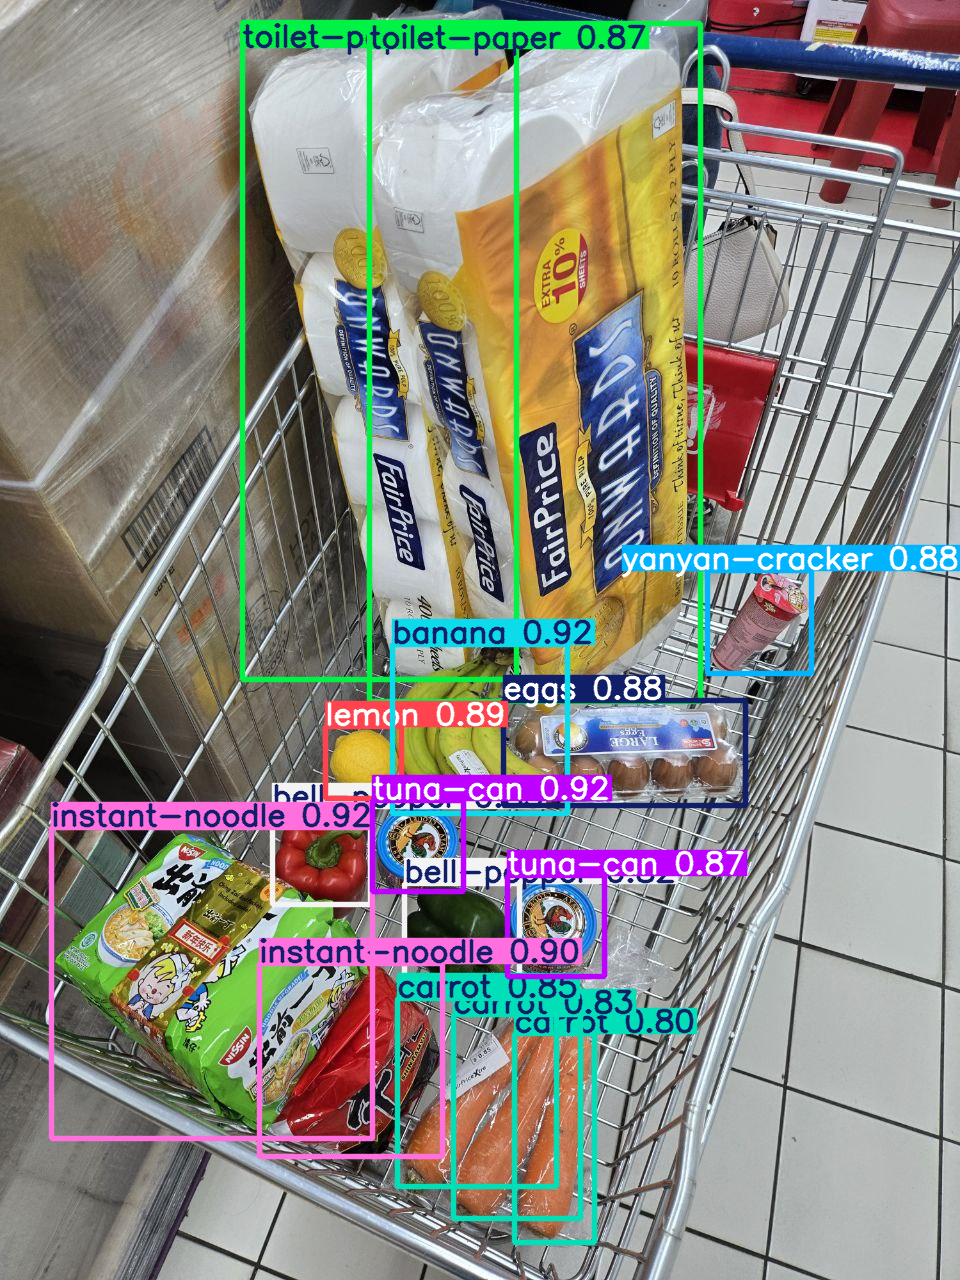

In [ ]:
import ultralytics
from ultralytics import YOLO
from PIL import Image

source = '/content/Grocery_random/image_trolley6.jpg'
#source = './sample1.jpg'
model = YOLO("/content/grocery/train4/weights/best.onnx", task='detect')
result_onnx = model(source, conf=0.5, iou=0.7)

# Visualize the results
for i, r in enumerate(result_onnx):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"image_trolley6" + '_detected' + ".jpg")

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on CPU
            results = model(frame, conf=0.7, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
from pathlib import Path
import os

video_in_file = "/content/Grocery_random/grocery_trolley1.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model = YOLO("/content/grocery/train4/weights/best.onnx", task="detect")
write_video(video_in_file, video_out_file, model)

  0%|          | 0/5204 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
0: 640x640 1 apple, 2 bell-peppers, 3 carrots, 1 instant-noodle, 1 toilet-paper, 2 tuna-cans, 6.8ms
Speed: 3.2ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 apple, 2 bell-peppers, 3 carrots, 1 instant-noodle, 1 toilet-paper, 2 tuna-cans, 6.9ms
Speed: 3.5ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 apple, 2 bell-peppers, 3 carrots, 1 instant-noodle, 1 toilet-paper, 1 tuna-can, 6.8ms
Speed: 2.5ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 apple, 2 bell-peppers, 2 carrots, 1 instant-noodle, 1 toilet-paper, 2 tuna-cans, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 apple, 2 bell-peppers, 3 carrots, 1 instant-noodle, 1 toilet-paper, 2 tuna-cans, 6.7ms
Speed: 2.4ms preprocess, 6.7ms inference, 1.5ms postprocess pe